# Tensorflow练习

## Mnist数据集

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [14]:
[list(i).index(1) for i in mnist.train.labels[:20]]

[7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0, 2, 9, 6, 0]

In [40]:
print(mnist.train.images[0,:]) # 零行任意列，一行代表一张照片

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


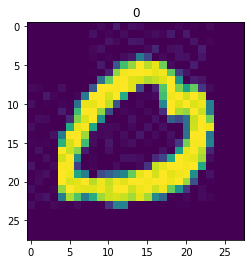

In [60]:
import scipy.misc, os
save_dir = 'MNIST_data/raw/'
if os.path.exists(save_dir) is False:
    os.makedirs(save_dir)
for i in range(20):
    image_array = mnist.train.images[i, :]
    image_array = image_array.reshape(28, 28)
    filename = save_dir + "mnist_train_%d.jpg" %i
    scipy.misc.toimage(image_array, cmin=0.0, cmax=1.0).save(filename)
    plt.imshow(plt.imread(filename))
    plt.title(list(mnist.train.labels[i,:]).index(1))

In [61]:
import numpy as np
for i in range(20):
    one_hot_label = mnist.train.labels[i, :]
    label = np.argmax(one_hot_label)
    print('mnist_train_%d.jpg label: %d'% (i, label))

mnist_train_0.jpg label: 7
mnist_train_1.jpg label: 3
mnist_train_2.jpg label: 4
mnist_train_3.jpg label: 6
mnist_train_4.jpg label: 1
mnist_train_5.jpg label: 8
mnist_train_6.jpg label: 1
mnist_train_7.jpg label: 0
mnist_train_8.jpg label: 9
mnist_train_9.jpg label: 8
mnist_train_10.jpg label: 0
mnist_train_11.jpg label: 3
mnist_train_12.jpg label: 1
mnist_train_13.jpg label: 2
mnist_train_14.jpg label: 7
mnist_train_15.jpg label: 0
mnist_train_16.jpg label: 2
mnist_train_17.jpg label: 9
mnist_train_18.jpg label: 6
mnist_train_19.jpg label: 0


## * use tensorflow to recognize MNIST

In [65]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
## W 线性变化将784维的数据转换为一个10维矩阵。现在我们考虑都是单行数据，也就是一张照片
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

# $ y_true $
y_ = tf.placeholder(tf.float32, [None, 10])

* ```placeholder--占位符；Varible---变量```

In [66]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y)))

In [68]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

* ```Optimizer ---优化器 ```

In [69]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

* ```session```是核心概念，是节点进行计算的上下文，过程中变化的变量会保存在会话中；```initializer()```实际上是在会话中保存变量的初始值

In [98]:
for _ in range(1000):
    
    # batch_xs 是形状为（ 100-, 784 ）自世噩像数据， batch_ys 是形如 (100, 10）盹薛茹扬茜batch_xs, batch_ys 对应着两个占世符 x 和 L
    batch_xs, batch_ys = mnist.train.next_batch(100)
    #在 Session 响~fitrain_step, @I咽费1专入占位持刷直
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [99]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 在Session中运行Tensor类得到tensor的值
print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9233
